In [ ]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# Create pandas DataFrame from file
data = pd.read_csv('/content/Social_Network_Ads.csv')
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
# Extract Input and Output
x = data.iloc[:,[2,3]].values
y = data.iloc[:,-1:].values
print(x.shape)
print(y.shape)

(400, 2)
(400, 1)


In [ ]:
# Split the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(320, 2) (80, 2)
(320, 1) (80, 1)


In [ ]:
# Input normalization
X_max = X_train.max(axis=0, keepdims=True)
X_min = X_train.min(axis=0, keepdims=True)
print(X_max.shape, X_min.shape)
print(X_max)
print(X_min)

(1, 2) (1, 2)
[[    60 150000]]
[[   18 15000]]


In [ ]:
X_train_scaled = (X_train - X_min)/(X_max - X_min)
X_test_scaled = (X_test - X_min)/(X_max - X_min)

In [ ]:
y_max = y_train.max(axis=0, keepdims=True)
y_min = y_train.min(axis=0, keepdims=True)
y_train_scaled = (y_train - y_min)/(y_max - y_min)
y_test_scaled = (y_test - y_min)/(y_max - y_min)

In [ ]:
# sigmoid function
g = lambda z : np.exp(z) / (1+np.exp(z))

def predict_prob(X,w):
  z = np.dot(X,w.T)
  return g(z)
def predict(X,w):
  y_hat = predict_prob(X,w)
  y_hat[y_hat >=0.5] =1
  y_hat[y_hat <0.5] =0
  return y_hat

In [ ]:
# loss function
def loss(X,y,w):
  y_hat = predict_prob(X,w)
  l = y*np.log(y_hat) + (1-y)*np.log(1-y_hat)
  return -np.mean(l)

In [ ]:
# gradient
def grad(X,y,w):
  y_hat = predict_prob(X,w)
  delta = y_hat - y
  dw = np.dot(X.T,delta)
  return dw.T

In [ ]:
def gradient_descent(X,y,lr = 0.02, epochs = 1000):
  w = np.zeros((1, X.shape[1]))
  losses = []
  for i in range(epochs):
    dw = grad(X,y,w)
    w -= lr*dw
    losses.append(loss(X,y,w))
  return losses,w

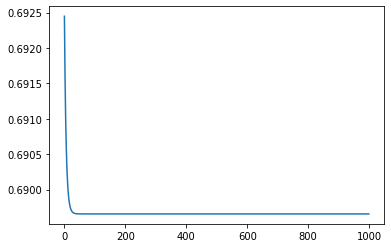

In [ ]:
loss,w = gradient_descent(X_train_scaled,y_train)
plt.plot(loss)

## **Viết lại python code cho mô hình hồi quy tuyến tính dưới dạng một class có tên là LogisticRegression1. Bao gồm cả hệ số bias (intercept) và sử dụng để xây dựng mô hình dự báo khả năng mua hàng của khách hàng. Đánh giá mô hình dựa trên tập dữ liệu test set.**

In [ ]:
import numpy as np

class LogisticRegression1:
    def __init__(self, learning_rate=0.02, num_iterations=1000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # Khởi tạo các tham số
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.learning_rate * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold = 0.5):
        y_pred = self.predict_prob(X)
        y_pred[y_pred >=threshold] =1
        y_pred[y_pred <threshold] =0
        return y_pred

In [ ]:
model = LogisticRegression1(fit_intercept=True)
model.fit(X_train_scaled, y_train.T[0,:])
y_hat = model.predict(X_test_scaled)

## **Dự đoán khả năng mua hàng của khách hàng trong tập test, so sánh giá trị dự báo với giá trị thực tế thông qua các đại lượng ACCURACY, RECALL, PRECISION**

In [ ]:
def accuracy(y_true, y_pred):
    # y_true và y_pred là hai danh sách chứa nhãn thực tế và nhãn dự đoán của các mẫu
    # Giả sử nhãn Positive là 1 và nhãn Negative là 0
    tp = tn = fp = fn = 0 # Khởi tạo các biến đếm
    for i in range(len(y_true)): # Duyệt qua từng cặp nhãn
        if y_true[i] == 1 and y_pred[i] == 1: # Nếu cả hai nhãn đều là Positive
            tp += 1 # Tăng biến tp lên 1
        elif y_true[i] == 0 and y_pred[i] == 0: # Nếu cả hai nhãn đều là Negative
            tn += 1 # Tăng biến tn lên 1
        elif y_true[i] == 0 and y_pred[i] == 1: # Nếu nhãn thực tế là Negative nhưng nhãn dự đoán lại là Positive
            fp += 1 # Tăng biến fp lên 1
        elif y_true[i] == 1 and y_pred[i] == 0: # Trường hợp còn lại, tức là nhãn thực tế là Positive nhưng nhãn dự đoán lại là Negative
            fn += 1 # Tăng biến fn lên 1
    
    print(f"Accuracy = {(tp+tn)/(tp+tn+fp+fn)}")
    print(f"Precision = {(tp)/(tp+fp)}")
    print(f"Recall = {(tp)/(tp+fn)}")

In [ ]:
accuracy(y_test, y_hat)

Accuracy = 0.7125
Precision = 1.0
Recall = 0.17857142857142858


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test_scaled, y_hat)
precision = precision_score(y_test_scaled, y_hat)
recall = recall_score(y_test_scaled, y_hat)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7125
Precision: 1.0
Recall: 0.17857142857142858
